In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import copy
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
def bias_trick(X):
    one = np.ones((X.shape[0],1))
    X_concat = np.concatenate((one, X), axis=1)
    return X_concat

def sigmoid(z):
    '''
        Sigmoid function
    '''
    return 1/(1+np.exp(-z))
def cost_J(X, y, w):
    '''
        Measure how the difference between model's prediction and target (labels) values 
        Params:
            @X: array-like,
                Input samples
            @y: array-like,
                Labels
            @w: array-like,
                Current weight
        Return: float,
            Value of cost function subject to weight.
    '''
    z = X.dot(w)
    hx = sigmoid(z) # prediction
    error = np.mean(-y*np.log(hx)-(1-y)*np.log(1-hx))
    return error

def gradient_J(X, y, w):
    '''
        Evaluate gradient of cost function subject to a weight.
        Params:
            @X: array-like,
                Input samples
            @y: array-like,
                Labels
            @w: array-like,
                Weight
        Return: array-like,
            Gradient of cost function
    '''
    return (1/X.shape[0]) * X.T.dot((X.dot(w) - y))

class LogisticsRegression:
    '''
       An inheritance of Logistics Regression model
    '''
    def __init__(self, learning_rate = 0.001, max_iters = 100, batch_size=64, epochs=100, fit_intercept=True):
        '''
            @X: array-like,
                Input data.
            @Y: array-like,
                Input label.
            @w_init: array-like,
                An initial weight
            @learning_rate: float, default=0.001
                Hyperparameter for the solvers (optimization algorithms) to converge, chosen by range 0 to 1.
            @max_iters: int, default=100
                Maximum number of iterations taken for the solvers to converge.
            @batch_size: int, default=64
                Size of the mini batches. Regulary, used for mini-batch gradient descent.
            @epochs: int, default=100
                The number of an ENTIRE dataset is passed.
                
        '''
        self.lr = learning_rate
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.epochs = epochs
        self.hist = []
        self.weights = {}
        self.fit_intercept = fit_intercept

    def fit(self, X, y, alg='SGD'):
        self.X = copy.deepcopy(X)
        self.Y = copy.deepcopy(y.reshape(-1,1))
        if self.fit_intercept == True:
            self.X = bias_trick(self.X)
        # Initialize w
        self.w = np.random.randn(self.X.shape[1], 1)

        if alg == 'SGD':
            self.SGD()
        elif alg == 'BGD':
            self.BatchGD()
        elif alg == 'MiniBGD':
            self.MiniBatchGD()
    def BatchGD(self):
        '''
            Perform Logistic Regression by Batch Gradient Descent
        '''
        pass
        N, p = self.X.shape
        w_old = self.w
        ep = 1e-3
        for epoch in range(self.epochs):
            grad = gradient_J(self.X, self.Y, self.w)
            self.w = self.w - self.lr * grad
            loss = cost_J(self.X, self.Y, self.w)
            self.hist.append(loss)
            print(f'>> Epoch: {epoch}/{self.epochs}, ================ Loss: {loss}')
            w_old = self.w
            self.weights[loss] = self.w
        self.coef_ = self.w[1:]
        self.intercept_ = self.w[0]
        # return self.w
    
    def SGD(self):
        '''
            Perform Logistics Regression by Stochastic Gradient Descent
        '''
        N, p = self.X.shape
        rnd_inds = list(range(N))
        for epoch in range(self.epochs):
            np.random.shuffle(rnd_inds)
            for j,i in enumerate(rnd_inds):
                x = self.X[i,:].reshape(-1,1)
                y = self.Y[i]
                grad = gradient_J(x.T, y, self.w)
                self.w = self.w - self.lr * grad
                loss = cost_J(x.T, y, self.w)
                print(f'w at iter {j}: ', self.w, f',====================== Loss: {loss}')
                self.hist.append(loss)
                self.weights[loss] = self.w
            print(f'>> Epoch: {epoch}/{self.epochs} ======================= Loss: {loss}')
        self.coef_ = self.w[1:]
        self.intercept_ = self.w[0]
        # return self.w
    def MiniBatchGD(self):
        '''
            Perform Logistics Regression by Mini-Batch Gradient Descent
        '''
        pass
        N, p = self.X.shape
        rnd_inds = list(range(N))
        for epoch in range(self.epochs):
            j = 0
            np.random.shuffle(rnd_inds)
            for iter in range(self.max_iters):
                if j > N:
                    break
                batch_inds = rnd_inds[j:j+self.batch_size]
                X = self.X[batch_inds,:]
                y = self.Y[batch_inds]
                grad = gradient_J(X,y,self.w)
                self.w = self.w - self.lr * grad             
                print(f'w at iter {iter}: ', self.w)
                j += self.batch_size
                loss = cost_J(X, y, self.w)
                self.hist.append(loss)
                self.weights[loss] = self.w
            print(f'>> Epoch: {epoch}/{self.epochs} =========================== Loss: {loss}')
        self.coef_ = self.w[1:]
        self.intercept_ = self.w[0]
        # return self.w
    def best_weights(self):
        '''
            Save the best weight of model
        '''
        # return min(self.weights.items(), key=lambda x: x[0])
        return (self.w, self.hist[-1])
    def history(self, ax):
        '''
            Plot a visualization for the loss function
        '''
        pass
        ax.plot(self.hist)
    def predict(self, X_test):
        if self.fit_intercept == True:
            X_test = bias_trick(X_test)
        pred = sigmoid(X_test @ self.w)
        return np.where(pred>0.5,1,0)

    def predict_proba(self, X_test):
        if self.fit_intercept == True:
            X_test = bias_trick(X_test)
        return sigmoid(X_test.dot(self.w))
    

In [4]:
X = data.drop('target',axis=1)
y = data.target
X, y = X.to_numpy(), y.to_numpy()

In [5]:
N, p = X.shape
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# w_init = np.random.randn(p+1, 1) # initialize w
model = LogisticsRegression(learning_rate=1e-5,epochs=2000)
model.fit(X_train, y_train, 'BGD')
pred_prob = model.predict_proba(X_test)
pred = model.predict(X_test)

>> Epoch: 0/2000, ================ Loss: nan
>> Epoch: 1/2000, ================ Loss: nan
>> Epoch: 2/2000, ================ Loss: nan
>> Epoch: 3/2000, ================ Loss: nan
>> Epoch: 4/2000, ================ Loss: nan
>> Epoch: 5/2000, ================ Loss: nan
>> Epoch: 6/2000, ================ Loss: nan
>> Epoch: 7/2000, ================ Loss: nan
>> Epoch: 8/2000, ================ Loss: nan
>> Epoch: 9/2000, ================ Loss: nan
>> Epoch: 10/2000, ================ Loss: nan
>> Epoch: 11/2000, ================ Loss: nan
>> Epoch: 12/2000, ================ Loss: nan
>> Epoch: 13/2000, ================ Loss: nan
>> Epoch: 14/2000, ================ Loss: nan
>> Epoch: 15/2000, ================ Loss: nan
>> Epoch: 16/2000, ================ Loss: nan
>> Epoch: 17/2000, ================ Loss: nan
>> Epoch: 18/2000, ================ Loss: nan
>> Epoch: 19/2000, ================ Loss: nan
>> Epoch: 20/2000, ================ Loss: nan
>> Epoch: 21/2000, ================ Loss: na

>> Epoch: 730/2000, ================ Loss: 0.9260020257840534
>> Epoch: 731/2000, ================ Loss: 0.9260363164893471
>> Epoch: 732/2000, ================ Loss: 0.926071228491159
>> Epoch: 733/2000, ================ Loss: 0.9261067515541217
>> Epoch: 734/2000, ================ Loss: 0.9261428755469175
>> Epoch: 735/2000, ================ Loss: 0.9261795904414035
>> Epoch: 736/2000, ================ Loss: 0.9262168863117342
>> Epoch: 737/2000, ================ Loss: 0.9262547533334997
>> Epoch: 738/2000, ================ Loss: 0.9262931817828596
>> Epoch: 739/2000, ================ Loss: 0.9263321620356917
>> Epoch: 740/2000, ================ Loss: 0.9263716845667377
>> Epoch: 741/2000, ================ Loss: 0.9264117399487619
>> Epoch: 742/2000, ================ Loss: 0.9264523188517113
>> Epoch: 743/2000, ================ Loss: 0.9264934120418832
>> Epoch: 744/2000, ================ Loss: 0.9265350103810963
>> Epoch: 745/2000, ================ Loss: 0.9265771048258706
>> Epoch:

>> Epoch: 1571/2000, ================ Loss: 0.939263820693974
>> Epoch: 1572/2000, ================ Loss: 0.9392479562459738
>> Epoch: 1573/2000, ================ Loss: 0.9392320855226077
>> Epoch: 1574/2000, ================ Loss: 0.9392162086503122
>> Epoch: 1575/2000, ================ Loss: 0.939200325754905
>> Epoch: 1576/2000, ================ Loss: 0.9391844369615875
>> Epoch: 1577/2000, ================ Loss: 0.9391685423949492
>> Epoch: 1578/2000, ================ Loss: 0.9391526421789677
>> Epoch: 1579/2000, ================ Loss: 0.9391367364370102
>> Epoch: 1580/2000, ================ Loss: 0.9391208252918389
>> Epoch: 1581/2000, ================ Loss: 0.9391049088656105
>> Epoch: 1582/2000, ================ Loss: 0.939088987279878
>> Epoch: 1583/2000, ================ Loss: 0.9390730606555954
>> Epoch: 1584/2000, ================ Loss: 0.9390571291131176
>> Epoch: 1585/2000, ================ Loss: 0.9390411927722027
>> Epoch: 1586/2000, ================ Loss: 0.939025251752

>> Epoch: 1738/2000, ================ Loss: 0.9366066397653515
>> Epoch: 1739/2000, ================ Loss: 0.9365910720158596
>> Epoch: 1740/2000, ================ Loss: 0.9365755120511751
>> Epoch: 1741/2000, ================ Loss: 0.936559959921038
>> Epoch: 1742/2000, ================ Loss: 0.9365444156748668
>> Epoch: 1743/2000, ================ Loss: 0.9365288793617589
>> Epoch: 1744/2000, ================ Loss: 0.9365133510304932
>> Epoch: 1745/2000, ================ Loss: 0.9364978307295304
>> Epoch: 1746/2000, ================ Loss: 0.9364823185070151
>> Epoch: 1747/2000, ================ Loss: 0.9364668144107765
>> Epoch: 1748/2000, ================ Loss: 0.9364513184883303
>> Epoch: 1749/2000, ================ Loss: 0.9364358307868798
>> Epoch: 1750/2000, ================ Loss: 0.9364203513533172
>> Epoch: 1751/2000, ================ Loss: 0.9364048802342251
>> Epoch: 1752/2000, ================ Loss: 0.9363894174758777
>> Epoch: 1753/2000, ================ Loss: 0.9363739631

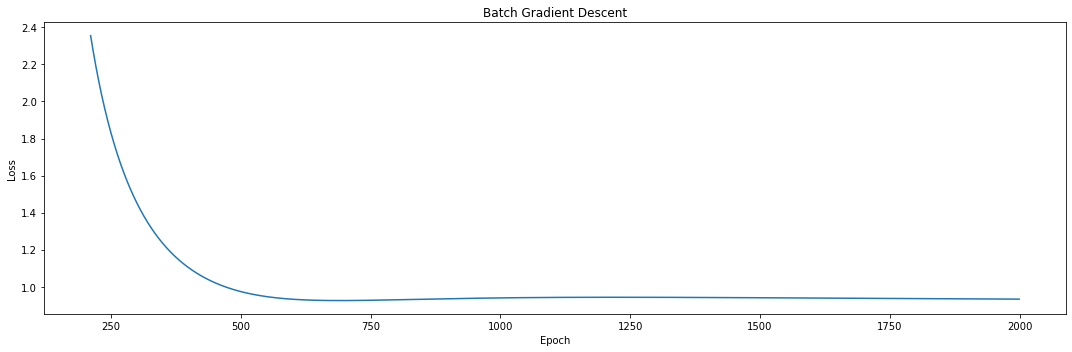

In [8]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
model.history(ax)
ax.set_title('Batch Gradient Descent')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.tight_layout()
plt.show()

In [9]:
# Sklearn Logistic Regression
skl_model = LogisticRegression()
skl_model.fit(X_train, y_train)
skl_pred = skl_model.predict(X_test)
skl_pred_proba = skl_model.predict_proba(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print('Score of my model: {}'.format(accuracy_score(pred, y_test)))
print('Score of sklearn model: {}'.format(accuracy_score(skl_pred, y_test)))

Score of my model: 0.5409836065573771
Score of sklearn model: 0.8852459016393442
